# Exploratory Data Analysis

## Retrieving Historical Data using Yahoo Query

In [4]:
from yahooquery import Ticker

prices = Ticker('^STI').history(period='max', interval='1d')
prices.head(5)

close        open  volume         low        high  \
symbol date                                                                 
^STI   1987-12-28  824.400024  824.400024     0.0  824.400024  824.400024   
       1987-12-29  810.900024  810.900024     0.0  810.900024  810.900024   
       1987-12-30  823.200012  823.200012     0.0  823.200012  823.200012   
       1988-01-04  833.599976  833.599976     0.0  833.599976  833.599976   
       1988-01-05  879.299988  879.299988     0.0  879.299988  879.299988   

                     adjclose  
symbol date                    
^STI   1987-12-28  824.400024  
       1987-12-29  810.900024  
       1987-12-30  823.200012  
       1988-01-04  833.599976  
       1988-01-05  879.299988

In [5]:
import pandas as pd

prices.reset_index(inplace=True)
prices.drop('symbol', axis=1, inplace=True)
prices.set_index('date', inplace=True)
prices.index = pd.to_datetime(prices.index)

In [ ]:
import os
os.mkdir('data')
prices.to_csv('data/STI.csv')

## Summary Plots and Statistics

<AxesSubplot:title={'center':'STI Daily Adjusted Close Price'}, xlabel='date', ylabel='SGD'>

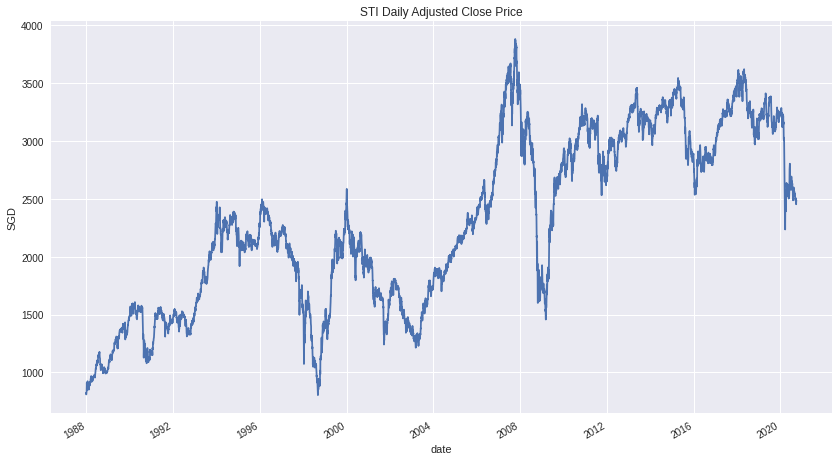

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

prices['adjclose'].plot(figsize=(14, 8), title='STI Daily Adjusted Close Price', ylabel='SGD')

In [21]:
prices = prices[['open', 'high', 'low', 'close', 'adjclose']]
prices.describe()

,open,high,low,close,adjclose
count,8174.000000,8174.000000,8174.000000,8174.000000,8174.000000
mean,2299.384243,2310.953700,2286.763988,2298.789276,2298.789276
std,744.755783,747.711564,741.168503,744.451913,744.451913
min,805.140015,809.869995,800.270020,805.039978,805.039978
25%,1635.460022,1646.582458,1623.062500,1634.957458,1634.957458
50%,2218.449951,2230.680054,2204.594971,2218.264893,2218.264893
75%,3025.840088,3041.420044,3008.789917,3026.570068,3026.570068
max,3899.290039,3906.159912,3852.689941,3875.770020,3875.770020


In [23]:
import numpy as np

log_returns = np.log(prices['adjclose'] / prices['adjclose'].shift(1)).dropna()
log_returns.describe()

count    8173.000000
mean        0.000135
std         0.011969
min        -0.105446
25%        -0.005199
50%         0.000169
75%         0.005718
max         0.128738
Name: adjclose, dtype: float64

<AxesSubplot:title={'center':'Log Returns'}, xlabel='date'>

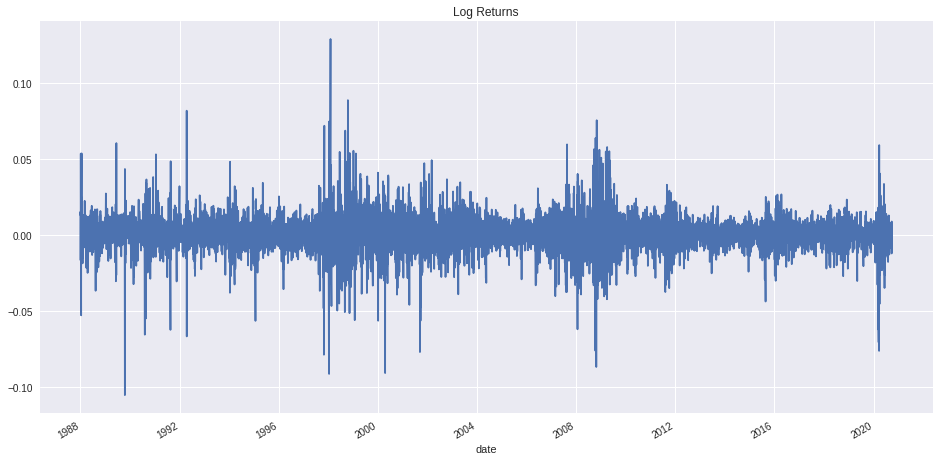

In [25]:
log_returns.plot(figsize=(16, 8), title='Log Returns')

<AxesSubplot:xlabel='adjclose', ylabel='Count'>

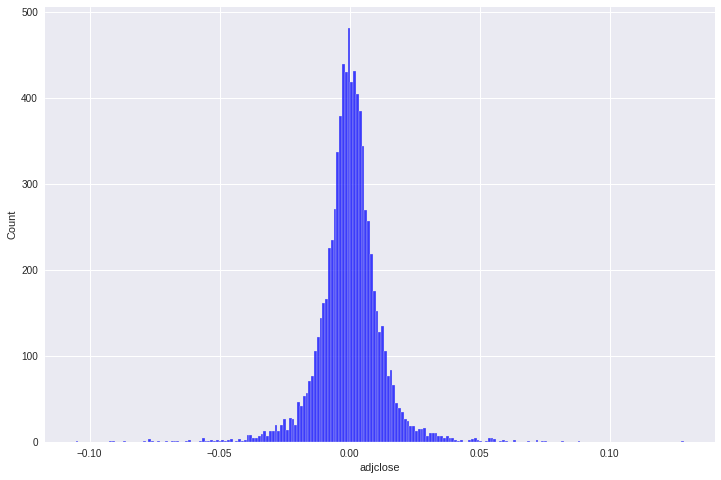

In [35]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(log_returns, color='blue')

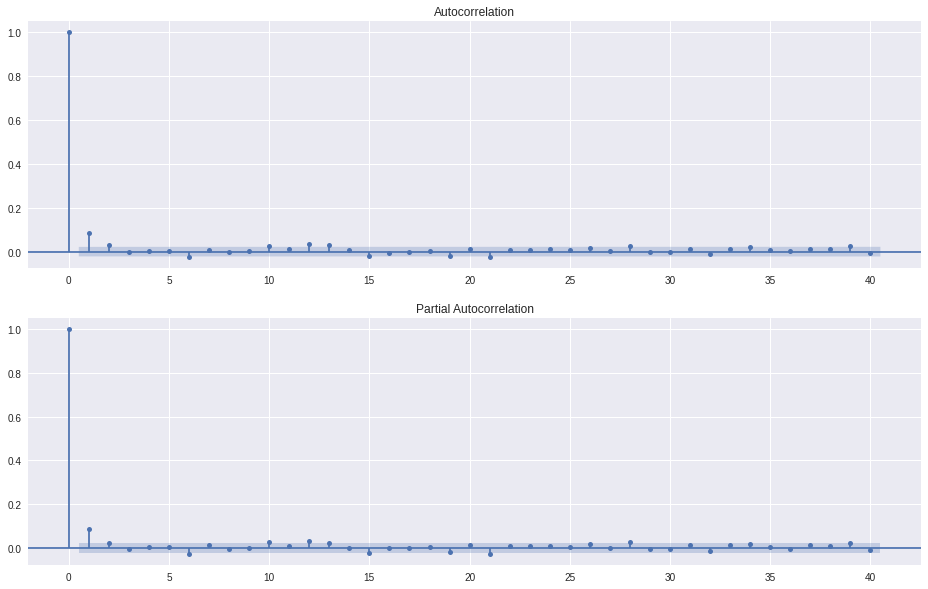

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, figsize=(16, 10))

plot_acf(log_returns, ax=axes[0])
plot_pacf(log_returns, ax=axes[1])
plt.show()

In [38]:
# statistical tests for stationarity
from statsmodels.tsa.stattools import adfuller

print(adfuller(log_returns))

(-22.16047488484761, 0.0, 14, 8158, {'1%': -3.431151833636392, '5%': -2.8618943539594732, '10%': -2.5669586178382677}, -49040.25061269429)
